In [1]:
import numpy as np
import pandas as pd
import json
from pathlib import Path

In [53]:
stats_id = '20211014143136' # TODO: sort this out
model_id = '20211014143136'
dataset_id = '20211018_only' # validate using data created after the model was trained
path = Path('data')

In [54]:
df = pd.read_csv(path/f'data_{dataset_id}.csv')
df_raw = df.copy()
with open(path/f'stats_data_{stats_id}.json', 'r') as f:
    stats = json.load(f)

In [55]:
# make all x and y values relative to tip of nose
for i in range(468):
    df[f'{i}x']=df[f'{i}x']-df['1x']
    df[f'{i}y']=df[f'{i}y']-df['1y']

In [56]:
# normalize
for i in range(468):
    if i == 1: continue # it's all zeros
    for coord in ['x','y','z']:
        col=f'{i}{coord}'
        df[col]=df[col]-stats[col]['mean']
        df[col]=df[col]/stats[col]['std']

In [57]:
# combine 0:no expression and 4:random into a single 0:ignore class
df.loc[df['expression_id']==4, 'expression_id']=0

In [58]:
df

,img_path,0x,0y,0z,1x,1y,1z,2x,2y,2z,...,465x,465y,465z,466x,466y,466z,467x,467y,467z,expression_id
0,20211018120201_1.jpeg,-0.035951,0.406456,0.482233,0.0,0.0,-0.062170,-0.444656,-0.184539,0.503369,...,-0.475401,-0.027435,-0.411144,-0.527005,0.015113,-0.175675,-0.542347,0.075381,-0.169735,0
1,20211018120201_2.jpeg,-0.309576,-0.431210,0.634689,0.0,0.0,-0.061859,-0.432161,-0.033625,0.557565,...,-0.434748,-0.019508,-0.348665,-0.474925,-0.036131,-0.150338,-0.488598,0.048493,-0.152664,0
2,20211018120201_3.jpeg,-0.325314,-0.116897,0.730793,0.0,0.0,-0.061060,-0.422585,-0.106342,0.740138,...,-0.425133,-0.079107,-0.381672,-0.487124,-0.028934,-0.176516,-0.504490,0.062990,-0.174919,0
3,20211018120201_4.jpeg,-0.346470,-0.216063,0.488655,0.0,0.0,-0.062072,-0.391522,-0.122656,0.435213,...,-0.385960,-0.107426,-0.237963,-0.436343,-0.046656,-0.082709,-0.453215,0.051882,-0.087467,0
4,20211018120201_5.jpeg,-0.378920,0.003368,0.368714,0.0,0.0,-0.061657,-0.359055,-0.177431,0.407323,...,-0.356265,-0.125250,-0.068260,-0.404496,-0.054999,0.034137,-0.420632,0.034878,0.027610,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20211018120732_496.jpeg,-1.819103,0.740418,-2.591325,0.0,0.0,-0.069956,0.839128,-2.152437,-3.270289,...,0.870089,-2.134986,1.949189,0.830828,-1.788681,1.888837,0.867596,-1.760101,1.889760,3
1996,20211018120732_497.jpeg,-1.673006,0.575643,-2.405995,0.0,0.0,-0.069621,0.774264,-2.114274,-3.061094,...,0.800448,-2.070877,1.730410,0.763018,-1.724026,1.727469,0.798047,-1.705592,1.732719,3
1997,20211018120732_498.jpeg,-1.702934,0.616818,-2.264715,0.0,0.0,-0.069020,0.743843,-2.071112,-2.931137,...,0.756354,-2.044120,1.675849,0.691163,-1.718267,1.649191,0.723348,-1.698611,1.655601,3
1998,20211018120732_499.jpeg,-1.652944,0.372098,-2.388590,0.0,0.0,-0.069994,0.704610,-2.040924,-3.143658,...,0.719010,-2.007488,1.693132,0.667980,-1.671778,1.688110,0.700016,-1.644779,1.691007,3


In [59]:
face_point_ids = [5, 2, 218, 438] # up,down,left,right - no point having 1 tip_of_nose as it's always 0
mouth_landmarks = [0, 11, 12, 13, 14, 15, 16, 17, 18, 37, 38, 39, 40, 41, 42, 43, 57, 61, 62, 72, 73, 74, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 95, 96, 106, 146, 164, 165, 167, 178, 179, 180, 181, 182, 183, 184, 185, 186, 191, 204, 267, 268, 269, 270, 271, 272, 273, 287, 291, 292, 302, 303, 304, 306, 307, 308, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 324, 325, 335, 375, 391, 393, 402, 403, 404, 405, 406, 407, 408, 409, 410, 415, 424]
cont_names = []
for i in face_point_ids+mouth_landmarks:
    cont_names.append(f'{i}x')
    cont_names.append(f'{i}y')

In [60]:
import pickle
class NpModelHelper:
    def __init__(self, path, model_id):
        self.model_id, self.path = model_id, path/f'model_{model_id}.pkl'
    def set_state(self, model):
        self.state_dict, state_dict = {}, learn.model.state_dict()
        for k in state_dict:
            self.state_dict[k] = state_dict[k].detach().cpu().numpy()
        return self
    def save(self):
        # can't set allow_pickle=False with np.savez https://github.com/numpy/numpy/issues/13983
        # so we might as well pickle and keep the dict order
        # TODO: don't need the dict order any more - go back to npz
        with open(self.path, 'wb') as f:
            pickle.dump(self.state_dict, f)
        return self
    def load(self):
        with open(self.path, 'rb') as f:
            self.state_dict = pickle.load(f)
        return self
    def get_state_dict(self, name_prefix):
        if name_prefix is None or name_prefix == '': 
            return self.state_dict
        return {k[len(name_prefix)+1:]:self.state_dict[k] 
                for k in self.state_dict 
                if k.startswith(name_prefix)}

In [61]:
class NpBatchNorm1d:
    # https://github.com/pytorch/pytorch/blob/420b37f3c67950ed93cd8aa7a12e673fcfc5567b/aten/src/ATen/native/Normalization.cpp#L61-L126
    def __init__(self, weight, bias, running_mean, running_var, num_batches_tracked=None):
        self.weight, self.bias = weight, bias
        self.running_mean, self.running_std = running_mean, np.sqrt(running_var + 1e-5)
    def __call__(self, x):
        x = x - self.running_mean
        x = x / self.running_std
        x = x * self.weight
        x = x + self.bias
        return x

In [62]:
class NpLinear:
    def __init__(self, weight, bias=None):
        self.weight, self.bias = weight.T, bias
    def __call__(self, x):
        x = x @ self.weight
        if self.bias is not None:
            x = x + self.bias
        return x

In [63]:
class NpReLU:
    def __call__(self, x):
        return np.maximum(x, 0)

In [64]:
class NpModel:
    def __init__(self, modules):
        self.modules = modules
    def __call__(self, x):
        for module in self.modules:
            x = module(x)
        return x

In [65]:
np_model_helper = NpModelHelper(path, model_id).load()
np_model = NpModel([
                    NpBatchNorm1d(**np_model_helper.get_state_dict('bn_cont')),
                    NpLinear(**np_model_helper.get_state_dict('layers.0.0')),
                    NpReLU(),
                    NpBatchNorm1d(**np_model_helper.get_state_dict('layers.0.2')),
                    NpLinear(**np_model_helper.get_state_dict('layers.1.0')),
                    NpReLU(),
                    NpBatchNorm1d(**np_model_helper.get_state_dict('layers.1.2')),
                    NpLinear(**np_model_helper.get_state_dict('layers.2.0'))
                   ])

In [66]:
class_count = np_model.modules[-1].weight.shape[1]
class_count

4

In [67]:
confusion_matrix = np.zeros([class_count,class_count], dtype=int)
output = np_model(df[cont_names].to_numpy())
preds = np.argmax(output, axis=1)
targets = df['expression_id'].to_numpy()
for p,t in zip(preds, targets):
    confusion_matrix[t][p]+=1

In [68]:
with open(path/'viseme-config.json') as f: 
    config = json.load(f)
class_ids=[]
class_labels=[]
for i in range(len(config['expressions'])):
    class_ids.append(i)
    class_labels.append(config['expressions'][str(i)])
class_ids, class_labels

([0, 1, 2, 3, 4], ['No expression', 'oo', 'ee', 'ah', 'Random Talking'])

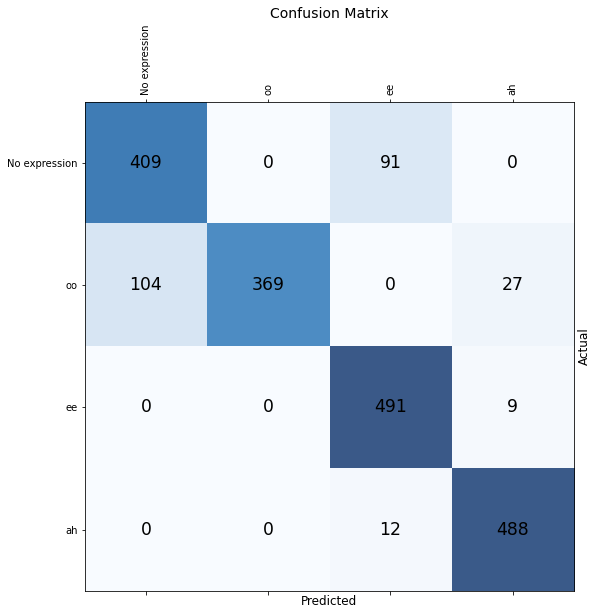

In [69]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,9))
ax.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.8)
# ax.xaxis.set_ticks_position('bottom') # must be after matshow
ax.yaxis.set_label_position('right')
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix[i, j], va='center', ha='center', size='xx-large')
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
tick_marks = np.arange(class_count)
# plt.xticks(tick_marks, self.data.y.classes, rotation=90)
plt.xticks(tick_marks, class_labels[:class_count], rotation=90)
plt.yticks(tick_marks, class_labels[:class_count], rotation=0)
plt.show()

In [ ]:
#v2

In [ ]:
#v1 conf mat

In [ ]:
%%time
np_model(df[cont_names][:2].to_numpy())

In [70]:
output = np_model(df[cont_names].to_numpy())
preds = np.argmax(output, axis=1)
targets = df['expression_id'].to_numpy()
target_of_interest, pred_of_interest, idxs = 0,2,[]
print('target_of_interest', class_labels[target_of_interest], 'pred_of_interest', class_labels[pred_of_interest])
print('overall accuracy',(targets==preds).sum()/len(targets))
print('accuracy for target_of_interest',(targets[targets==target_of_interest]==preds[targets==target_of_interest]).sum()/len(targets[targets==target_of_interest]))
for i, (p,t) in enumerate(zip(preds,targets)):
    if t==target_of_interest and p==pred_of_interest:
        idxs.append(i)
#     if p!=t: print(i,'pred',p,'target',t)
df_raw.iloc[idxs]

target_of_interest No expression pred_of_interest ee
overall accuracy 0.8785
accuracy for target_of_interest 0.818


,img_path,0x,0y,0z,1x,1y,1z,2x,2y,2z,...,465x,465y,465z,466x,466y,466z,467x,467y,467z,expression_id
80,20211018120208_81.jpeg,0.483215,0.661201,-0.027119,0.487125,0.606061,-0.063488,0.483434,0.619337,-0.030767,...,0.500791,0.495051,-0.012392,0.564404,0.473532,0.016854,0.569759,0.467182,0.017541,0
81,20211018120208_82.jpeg,0.480489,0.662258,-0.027233,0.483703,0.608097,-0.063657,0.480659,0.621034,-0.030860,...,0.498202,0.494838,-0.012275,0.562604,0.472403,0.016012,0.567794,0.466598,0.016557,0
82,20211018120208_83.jpeg,0.479166,0.664012,-0.026479,0.482317,0.609713,-0.063728,0.479221,0.622382,-0.030672,...,0.496797,0.495497,-0.013117,0.561091,0.473036,0.015104,0.566371,0.467044,0.015635,0
83,20211018120208_84.jpeg,0.475002,0.665343,-0.025585,0.478009,0.611754,-0.063392,0.475227,0.623826,-0.030139,...,0.494248,0.496777,-0.014183,0.559509,0.473698,0.012699,0.564838,0.467907,0.013029,0
85,20211018120208_86.jpeg,0.475222,0.665844,-0.026269,0.477381,0.614139,-0.063866,0.474920,0.625966,-0.030570,...,0.492476,0.497751,-0.013613,0.557880,0.474508,0.013499,0.563162,0.468709,0.013858,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,20211018120235_398.jpeg,0.456146,0.665306,-0.025070,0.456444,0.614704,-0.062487,0.455594,0.626062,-0.029451,...,0.473928,0.497121,-0.014926,0.539870,0.471294,0.008535,0.544854,0.466454,0.008464,0
398,20211018120235_399.jpeg,0.454499,0.663190,-0.024107,0.453875,0.613696,-0.061719,0.453613,0.624380,-0.028684,...,0.472549,0.494612,-0.015960,0.539209,0.467835,0.006388,0.544432,0.462714,0.006191,0
399,20211018120235_400.jpeg,0.455443,0.659696,-0.024951,0.454960,0.610139,-0.062171,0.454518,0.620985,-0.029217,...,0.473218,0.491985,-0.014963,0.539652,0.466243,0.008429,0.544831,0.461261,0.008334,0
400,20211018120235_401.jpeg,0.454970,0.657155,-0.025815,0.455109,0.606386,-0.062506,0.454429,0.617869,-0.029862,...,0.472872,0.489472,-0.013898,0.538839,0.464651,0.009653,0.544084,0.459907,0.009550,0


In [71]:
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return np.round(e_x / e_x.sum(axis=1, keepdims=True), 2)

In [72]:
softmax(output[75:95])

array([[0.79, 0.  , 0.21, 0.  ],
       [0.97, 0.  , 0.03, 0.  ],
       [0.95, 0.  , 0.05, 0.  ],
       [0.93, 0.  , 0.07, 0.  ],
       [0.72, 0.  , 0.28, 0.  ],
       [0.24, 0.  , 0.76, 0.  ],
       [0.4 , 0.  , 0.6 , 0.  ],
       [0.27, 0.  , 0.73, 0.  ],
       [0.49, 0.  , 0.51, 0.  ],
       [0.64, 0.  , 0.36, 0.  ],
       [0.26, 0.  , 0.74, 0.  ],
       [0.53, 0.  , 0.47, 0.  ],
       [0.42, 0.  , 0.58, 0.  ],
       [0.3 , 0.  , 0.7 , 0.  ],
       [0.14, 0.  , 0.86, 0.  ],
       [0.1 , 0.  , 0.9 , 0.  ],
       [0.12, 0.  , 0.88, 0.  ],
       [0.14, 0.  , 0.86, 0.  ],
       [0.27, 0.  , 0.73, 0.  ],
       [0.11, 0.  , 0.89, 0.  ]])

In [ ]:
preds[:500] #0:no expression
# preds[1000:1500] # 2:ee
# preds[1500:] # 3:ah

In [ ]:
idxs_all[150:]

In [ ]:
idxs_all=idxs